In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [10]:
#The file is stored locally
filepath = '/Users/ivylai/Desktop/Galvanize/W04/Police_Department_Incident_Reports__2018_to_Present.csv'

In [165]:
data = pd.read_csv(filepath)

In [12]:
# data.info()

In [166]:
data = data.drop(columns=['HSOC Zones as of 2018-06-05','OWED Public Spaces','Central Market/Tenderloin Boundary Polygon - Updated','Parks Alliance CPSI (27+TL sites)','ESNCAG - Boundary File','Areas of Vulnerability, 2016'])
data = data.drop(columns=['CAD Number', 'Filed Online', 'CNN'])
data = data.drop(columns=['Row ID', 'Incident Number'])
data = data.drop(columns=['Report Type Code', 'Incident Code'])
data = data.drop(columns=['Supervisor District', 'SF Find Neighborhoods','Current Police Districts','Current Supervisor Districts','Analysis Neighborhoods'])

In [14]:
data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Report Type Description,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,point
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,618930,Vehicle Supplement,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,Southern,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,618931,Initial,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,Ingleside,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"
2,2018/01/01 10:00:00 AM,2018/01/01,10:00,2018,Monday,2018/01/01 10:20:00 AM,618932,Initial Supplement,Missing Person,Missing Person,Found Person,Open or Active,VAN NESS AVE \ WILLOW ST,Northern,Tenderloin,37.783370,-122.420832,"(37.78337048750076, -122.42083185184009)"
3,2018/01/01 10:03:00 AM,2018/01/01,10:03,2018,Monday,2018/01/01 10:04:00 AM,618935,Initial,Other Miscellaneous,Other,"Driving, No License Issued",Cite or Arrest Adult,BRAZIL AVE \ MISSION ST,Ingleside,Outer Mission,37.724683,-122.434798,"(37.72468255342173, -122.43479841474401)"
4,2018/01/01 09:01:00 AM,2018/01/01,09:01,2018,Monday,2018/01/01 09:39:00 AM,618936,Vehicle Supplement,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,CUSTOM HOUSE PL \ JACKSON ST,Central,Chinatown,37.796698,-122.401294,"(37.796698028315056, -122.40129440446798)"


In [15]:
#Data include incidents from 2018/01/01 to 2021/02/20
data_sorted = data.sort_values(by = 'Incident Datetime')
first_datetime = data_sorted['Incident Datetime'][0]
last_datetime = data_sorted['Incident Datetime'][len(data_sorted)-1]

print(f'First datatime in the log is :{first_datetime}')
print(f'Last datatime in the log is :{last_datetime}')

First datatime in the log is :2018/01/01 09:26:00 AM
Last datatime in the log is :2021/02/20 02:00:00 AM


In [16]:
#the percent of data that doesn't contain "Incident Category"
round((1 - 436045/436393) * 100, 2)

0.08

In [17]:
#check if anything is interesting for the entries with no Incident Category
data[data['Incident Category'].isnull()]['Incident Description'].value_counts()

Public Health Order Violation, Notification                                             155
Public Health Order Violation, After Notification                                        46
Driving, Stunt Vehicle/Street Racing                                                     46
Driving, Sideshow/Street Racing                                                          36
Service of Documents Related to a Civil Drug Abatement and/or Public Nuisance Action     13
Sexual Assault, Aggravated, of Child                                                     11
Military Ordinance                                                                       10
Theft, Boat                                                                               9
Gun Violence Restraining Order                                                            7
Auto Impounded                                                                            6
Pyrotechnic Explosive Device - Barrel Bomb                                      

In [18]:
def proportion(value_series):
    return round((value_series / sum(value_series)) * 100, 2)

In [19]:
def series_to_arr(series):
    labels = series.index.astype(str).to_numpy()
    y = series.to_numpy()
    return labels, y

In [20]:
def series_to_pie(ax, series):
    labels, y = series_to_arr(series)
    labels[y/sum(y) < 0.008] = ''
    return ax.pie(y, labels=labels, labeldistance=1.05)

In [21]:
def set_fontsize_for_pie(texts, bigsize, smallsize, smallsize_idx):
    texts[0].set_fontsize(bigsize)
    for i, text in enumerate(texts):  
        if i > smallsize_idx:
            text.set_fontsize(smallsize)

In [22]:
def get_month_hour(data, year):
    month_str = data[data['Incident Year'] == year]['Incident Month'].astype(str)
    hour_str = data['Incident Hour']
    return ('M:'+ month_str +' H:' + hour_str).value_counts().sort_index()

Text(0.5, 1.0, 'Incident Categories')

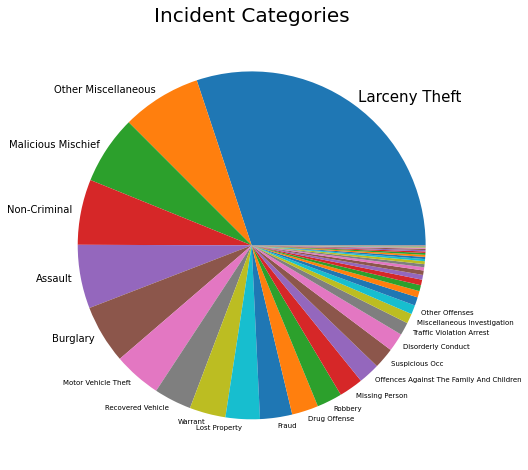

In [169]:
#Make a pie chart for Incident Categories
incident_cat = data['Incident Category'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
_, texts = series_to_pie(ax, incident_cat)
set_fontsize_for_pie(texts, 15, 7, 5)
ax.set_title('Incident Categories', fontsize = 20)

In [24]:
#Find proportion of the top 5 categories
proportion(incident_cat).head()

Larceny Theft          30.12
Other Miscellaneous     7.38
Malicious Mischief      6.38
Non-Criminal            6.07
Assault                 5.92
Name: Incident Category, dtype: float64

In [181]:
# data[data['Incident Category'] =='Assault']['Incident Description'].value_counts()

#### Based on the chart, I decided to focus on Larceny Theft as it makes up 30% of the incident reports.

In [25]:
larceny_data = data[data['Incident Category'] == 'Larceny Theft']

In [26]:
larceny_data['incident_to_report'] = pd.to_datetime(larceny_data['Report Datetime']) - pd.to_datetime(larceny_data['Incident Datetime'])

<ipython-input-26-3392920be578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larceny_data['incident_to_report'] = pd.to_datetime(larceny_data['Report Datetime']) - pd.to_datetime(larceny_data['Incident Datetime'])


Text(0.5, 1.0, 'Larceny - Incident to Report')

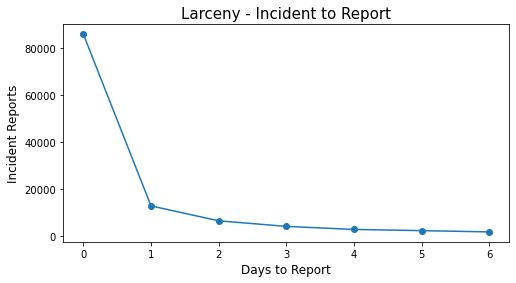

In [27]:
#Make a chart to see how soon the incident get reported
incident_to_report = larceny_data['incident_to_report'].dt.days.value_counts()
x,y = series_to_arr(incident_to_report.iloc[:7].sort_index())

fig,ax = plt.subplots(figsize = (8,4))
ax.plot(x , y)
ax.scatter(x, y)
ax.set_ylabel('Incident Reports', fontsize = 12)
ax.set_xlabel('Days to Report', fontsize = 12)
ax.set_title('Larceny - Incident to Report', fontsize = 15)

In [28]:
proportion(incident_to_report).head(10)

0    65.37
1     9.77
2     4.93
3     3.13
4     2.14
5     1.75
6     1.33
7     1.15
8     0.89
9     0.73
Name: incident_to_report, dtype: float64

#### Based on the chart, I will be using Incident Datetime throughout the study, as the report time is within two weeks of the incident time 90% of the time.

In [29]:
#To see a list of incident descriptions and manually come up with different brackets for lancery amounts
# larceny_data['Incident Description'].value_counts().index.to_numpy()
amounts = {'$50-$200':'\$50-$200', '$200-$950':'\$200-$950', '$200-$400':'\$200-$950', '<$50':'<$50' , 'Att.':'Attempted', 'Attempted':'Attempted' , '>$950':'>$950', 'License':'License Plate'}

In [30]:
#Based on the amount brackets found above, create a new column to host the amounts
larceny_data['Larceny Amount'] = larceny_data['Incident Description']
# larceny_data.head()

<ipython-input-30-6093351c481e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larceny_data['Larceny Amount'] = larceny_data['Incident Description']


In [31]:
#Populate the column
for k, v in amounts.items():
    bool_idx = larceny_data['Incident Description'].str.contains(k, regex = False)
    larceny_data['Larceny Amount'][bool_idx] = v
larceny_data.head()

<ipython-input-31-b8b262bba492>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larceny_data['Larceny Amount'][bool_idx] = v
/Users/ivylai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Report Type Description,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,point,incident_to_report,Larceny Amount
7,2018/01/01 03:00:00 AM,2018/01/01,03:00,2018,Monday,2018/01/01 10:57:00 AM,618939,Initial,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,08TH ST \ MISSION ST,Southern,South of Market,37.777457,-122.413158,"(37.77745741894575, -122.4131576926893)",0 days 07:57:00,\$200-$950
12,2018/01/01 08:17:00 AM,2018/01/01,08:17,2018,Monday,2018/01/01 08:28:00 AM,618944,Initial,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,ELLIS ST \ WEBSTER ST,Northern,Western Addition,37.782570,-122.430798,"(37.782569887796356, -122.43079788213421)",0 days 00:11:00,>$950
19,2018/01/01 02:50:00 PM,2018/01/01,14:50,2018,Monday,2018/01/01 02:55:00 PM,619001,Initial,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,FRONT ST \ GREEN ST,Central,Financial District/South Beach,37.800607,-122.400250,"(37.800607119774014, -122.40025046404315)",0 days 00:05:00,>$950
20,2018/01/01 02:00:00 PM,2018/01/01,14:00,2018,Monday,2018/01/01 02:06:00 PM,619002,Initial,Larceny Theft,Larceny Theft - Shoplifting,"Theft, Shoplifting, $200-$950",Open or Active,POWELL ST \ OFARRELL ST,Central,Tenderloin,37.786410,-122.408036,"(37.78640961281089, -122.40803623744476)",0 days 00:06:00,\$200-$950
25,2018/01/01 02:00:00 PM,2018/01/01,14:00,2018,Monday,2018/01/01 03:46:00 PM,619006,Initial,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,FULTON ST \ CENTRAL AVE,Park,Lone Mountain/USF,37.776017,-122.444780,"(37.77601659060897, -122.44477989251513)",0 days 01:46:00,>$950


In [134]:
larceny_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131316 entries, 7 to 436385
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   Incident Datetime        131316 non-null  object         
 1   Incident Date            131316 non-null  object         
 2   Incident Time            131316 non-null  object         
 3   Incident Year            131316 non-null  int64          
 4   Incident Day of Week     131316 non-null  object         
 5   Report Datetime          131316 non-null  object         
 6   Incident ID              131316 non-null  int64          
 7   Report Type Description  131316 non-null  object         
 8   Incident Category        131316 non-null  object         
 9   Incident Subcategory     131316 non-null  object         
 10  Incident Description     131316 non-null  object         
 11  Resolution               131316 non-null  object         
 12  In

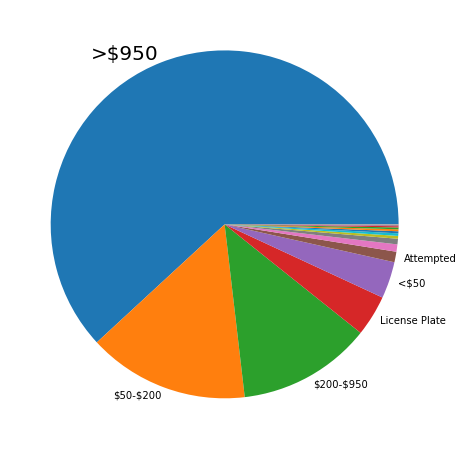

In [34]:
#Make a pie chart for different lancery amounts
larceny_amounts = larceny_data['Larceny Amount'].value_counts()

fig, ax = plt.subplots(figsize = (8,8))
_, texts = series_to_pie(ax, larceny_amounts)
set_fontsize_for_pie(texts, 20, 10, 5)

In [35]:
#Proportion for top 5 amount brackets
proportion(larceny_amounts).head()

>$950            61.87
\$50-$200        14.98
\$200-$950       12.43
License Plate     3.81
<$50              3.41
Name: Larceny Amount, dtype: float64

#### Based on the chart, \>$950 is the most common amount.

In [36]:
larcency_subcat = larceny_data['Incident Subcategory'].value_counts()

In [37]:
proportion(larcency_subcat)

Larceny - From Vehicle           56.23
Larceny Theft - Other            24.71
Larceny Theft - From Building     6.09
Larceny Theft - Shoplifting       5.57
Theft From Vehicle                4.23
Larceny Theft - Pickpocket        1.32
Larceny Theft - Bicycle           1.26
Larceny - Auto Parts              0.53
Larceny Theft - Purse Snatch      0.06
Name: Incident Subcategory, dtype: float64

In [38]:
#Investigate subcategory
larceny_data[larceny_data['Incident Subcategory'] == 'Theft From Vehicle']['Incident Description'].value_counts()

License Plate, Stolen                    4605
Burglary, Vehicle (Arrest made)           892
Burglary, Vehicle, Att. (Arrest made)      57
Name: Incident Description, dtype: int64

Text(0.5, 1.0, 'Larceny Theft - Incident Subcategories')

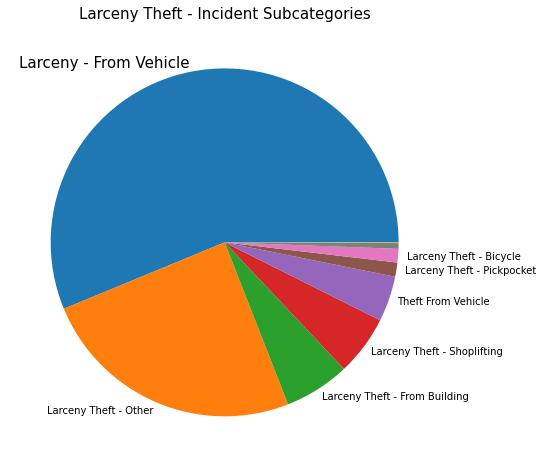

In [183]:
fig, ax = plt.subplots(figsize=(8, 8))
_, texts = series_to_pie(ax, larcency_subcat)
set_fontsize_for_pie(texts, 15, 10, 5)
ax.set_title('Larceny Theft - Incident Subcategories',fontsize = 15)

#### From the chart, Larceny from vehicle are the most common subcategory.

<ipython-input-168-a0160ad30b8a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2018','2019','2020','2021'],fontsize = 15)


Text(0.5, 1.0, 'Incident Reports per Year')

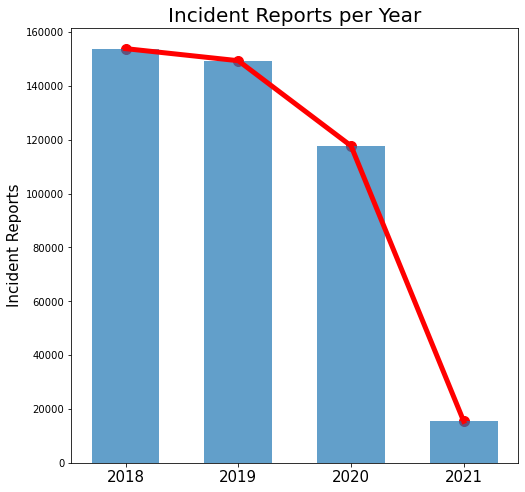

In [168]:
#All Incident Reports per Year

year = data['Incident Year'].astype(str).value_counts().sort_index(ascending = True)
x, y = series_to_arr(year)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x, y, c = 'red', s = 100)
ax.plot(x, y, c = 'red',linewidth = 5)
ax.bar(x, y, width = 0.6, alpha = 0.7)
ax.set_xticklabels(['2018','2019','2020','2021'],fontsize = 15)
ax.set_ylabel('Incident Reports', fontsize = 15)
ax.set_title('Incident Reports per Year', fontsize = 20)

<ipython-input-41-100783d271be>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2018','2019','2020','2021'],fontsize = 15)


Text(0.5, 1.0, 'Larceny - Incident Reports per Year')

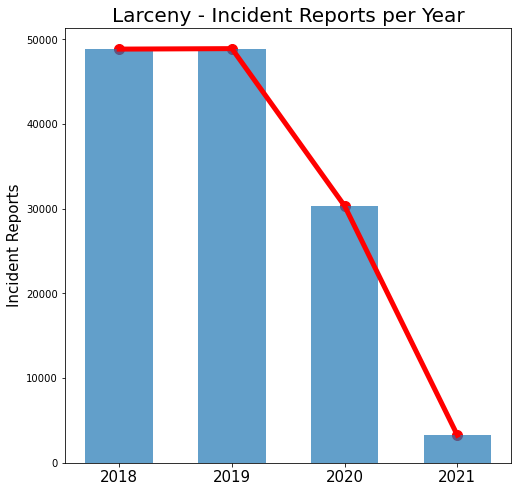

In [41]:
#Analyze larceny trend over year
larceny_year = larceny_data['Incident Year'].astype(str).value_counts().sort_index(ascending = True)
x, y = series_to_arr(larceny_year)

fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(x, y, c = 'red', s = 100)
ax.plot(x, y, c = 'red',linewidth = 5)
ax.bar(x, y, width = 0.6, alpha = 0.7)
ax.set_xticklabels(['2018','2019','2020','2021'],fontsize = 15)
ax.set_ylabel('Incident Reports', fontsize = 15)
ax.set_title('Larceny - Incident Reports per Year', fontsize = 20)

In [42]:
larceny_data['Incident YM'] = pd.to_datetime(larceny_data['Incident Datetime']).dt.to_period('M')
# larceny_data['Incident YM'].value_counts()

<ipython-input-42-66eadeca375f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larceny_data['Incident YM'] = pd.to_datetime(larceny_data['Incident Datetime']).dt.to_period('M')


In [43]:
larceny_data['Incident Month'] = larceny_data['Incident YM'].astype(str).str[-2:]
# larceny_data['Incident Month'].value_counts()

<ipython-input-43-98c1f780830a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larceny_data['Incident Month'] = larceny_data['Incident YM'].astype(str).str[-2:]


In [44]:
larceny_ym = larceny_data['Incident YM'].astype(str).value_counts().sort_index(ascending = True)
x, y = series_to_arr(larceny_ym)

Text(0.5, 1.0, 'Larceny - Incident Reports per Month')

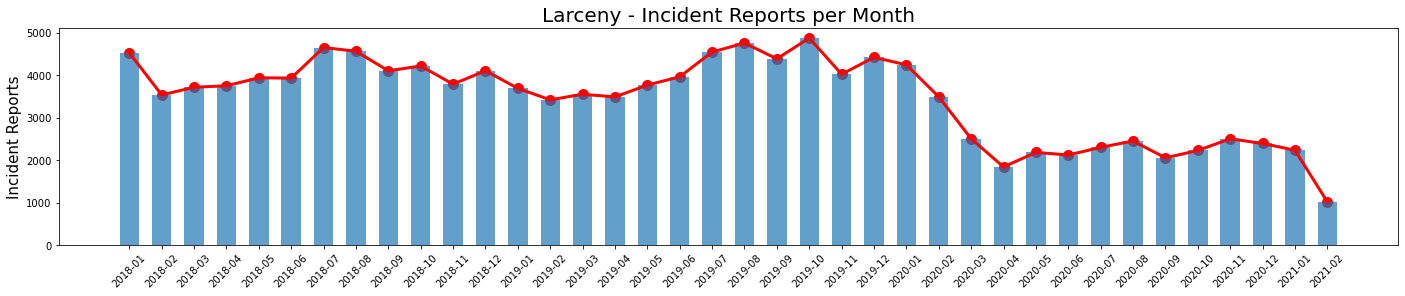

In [45]:
fig, ax = plt.subplots(figsize = (24,4))
ax.scatter(x, y, c = 'red', s = 100)
ax.plot(x, y, c = 'red',linewidth = 3)
ax.bar(x, y, width = 0.6, alpha = 0.7)
ax.tick_params(axis='x',labelrotation=45)
ax.set_ylabel('Incident Reports', fontsize = 15)
ax.set_title('Larceny - Incident Reports per Month', fontsize = 20)

In [46]:
larceny_data['Incident Hour'] = larceny_data['Incident Time'].str[0:2]
# larceny_data['Incident Hour'].value_count()

<ipython-input-46-c977e1af33af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  larceny_data['Incident Hour'] = larceny_data['Incident Time'].str[0:2]


In [47]:
# larceny_sub = larceny_data.groupby('Incident Subcategory')

# for sub_name, sub_data in larceny_sub:
#     print(sub_name)
#     print(sub_data['Incident Hour'].value_counts())

In [48]:
y18_m_h = get_month_hour(larceny_data, 2018)
y19_m_h = get_month_hour(larceny_data, 2019)
y20_m_h = get_month_hour(larceny_data, 2020)
y21_m_h = get_month_hour(larceny_data, 2021)

Text(0.5, 1.0, 'Larceny - Incident Reports per Month & Hour')

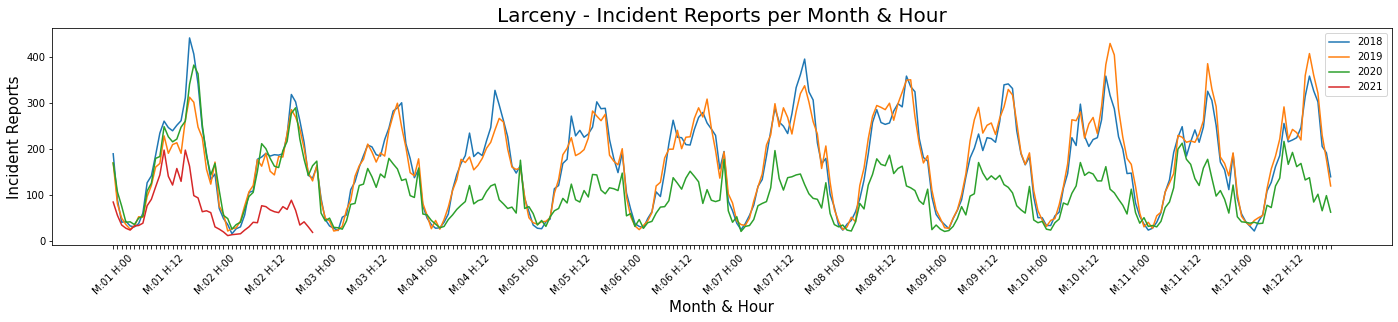

In [49]:
fig, ax = plt.subplots(figsize = (24,4))
x, y = series_to_arr(y18_m_h)
ax.plot(x, y, label = '2018')
x, y = series_to_arr(y19_m_h)
ax.plot(x, y, label = '2019')
x, y = series_to_arr(y20_m_h)
ax.plot(x, y, label = '2020')
x, y = series_to_arr(y21_m_h)
ax.plot(x, y, label = '2021')
ax.tick_params(axis='x', labelrotation=45)
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 12 != 0:
        label.set_visible(False)
ax.set_xlabel('Month & Hour', fontsize = 15)
ax.set_ylabel('Incident Reports', fontsize = 15)
ax.legend()
ax.set_title('Larceny - Incident Reports per Month & Hour', fontsize = 20)

Text(0.5, 1.0, 'Larceny - Incident Reports per Hour')

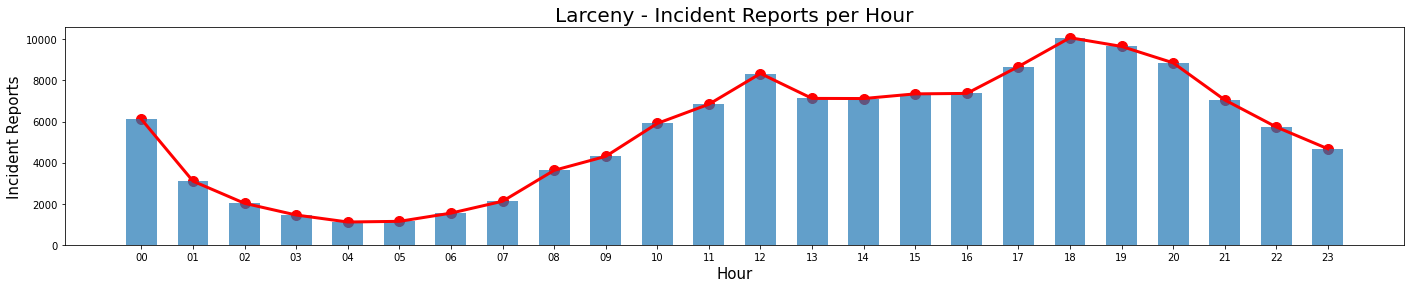

In [50]:
fig, ax = plt.subplots(figsize = (24,4))
x, y = series_to_arr(larceny_data['Incident Hour'].value_counts().sort_index())
ax.scatter(x, y, c = 'red', s = 100)
ax.plot(x, y, c = 'red',linewidth = 3)
ax.bar(x, y, width = 0.6, alpha = 0.7)
# ax.tick_params(labelrotation=45)
ax.set_xlabel('Hour', fontsize = 15)
ax.set_ylabel('Incident Reports', fontsize = 15)
ax.set_title('Larceny - Incident Reports per Hour', fontsize = 20)

In [51]:
larceny_data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Report Type Description,Incident Category,Incident Subcategory,...,Police District,Analysis Neighborhood,Latitude,Longitude,point,incident_to_report,Larceny Amount,Incident YM,Incident Month,Incident Hour
7,2018/01/01 03:00:00 AM,2018/01/01,03:00,2018,Monday,2018/01/01 10:57:00 AM,618939,Initial,Larceny Theft,Larceny - From Vehicle,...,Southern,South of Market,37.777457,-122.413158,"(37.77745741894575, -122.4131576926893)",0 days 07:57:00,\$200-$950,2018-01,01,03
12,2018/01/01 08:17:00 AM,2018/01/01,08:17,2018,Monday,2018/01/01 08:28:00 AM,618944,Initial,Larceny Theft,Larceny - From Vehicle,...,Northern,Western Addition,37.782570,-122.430798,"(37.782569887796356, -122.43079788213421)",0 days 00:11:00,>$950,2018-01,01,08
19,2018/01/01 02:50:00 PM,2018/01/01,14:50,2018,Monday,2018/01/01 02:55:00 PM,619001,Initial,Larceny Theft,Larceny - From Vehicle,...,Central,Financial District/South Beach,37.800607,-122.400250,"(37.800607119774014, -122.40025046404315)",0 days 00:05:00,>$950,2018-01,01,14
20,2018/01/01 02:00:00 PM,2018/01/01,14:00,2018,Monday,2018/01/01 02:06:00 PM,619002,Initial,Larceny Theft,Larceny Theft - Shoplifting,...,Central,Tenderloin,37.786410,-122.408036,"(37.78640961281089, -122.40803623744476)",0 days 00:06:00,\$200-$950,2018-01,01,14
25,2018/01/01 02:00:00 PM,2018/01/01,14:00,2018,Monday,2018/01/01 03:46:00 PM,619006,Initial,Larceny Theft,Larceny - From Vehicle,...,Park,Lone Mountain/USF,37.776017,-122.444780,"(37.77601659060897, -122.44477989251513)",0 days 01:46:00,>$950,2018-01,01,14


In [182]:
# Example of geopandas

# df = pd.DataFrame(
#     {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
#      'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
#      'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
#      'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # We restrict to South America.
# ax = world[world.continent == 'South America'].plot(
#     color='white', edgecolor='black')

# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
# # We can now plot our ``GeoDataFrame``.
# gdf.plot(ax=ax, color='red')

In [80]:
from shapely.geometry import Point, Polygon

In [85]:
sf_shp = '/Users/ivylai/Downloads/Analysis Neighborhoods/geo_export_675b81e4-24a6-4501-b140-a21d0e762b6c.shp'

sf = gpd.read_file(sf_shp)

sf.head()

,nhood,geometry
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7..."
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7..."
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7..."
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7..."
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7..."


Text(0.5, 1.0, 'Larceny Reports over SF')

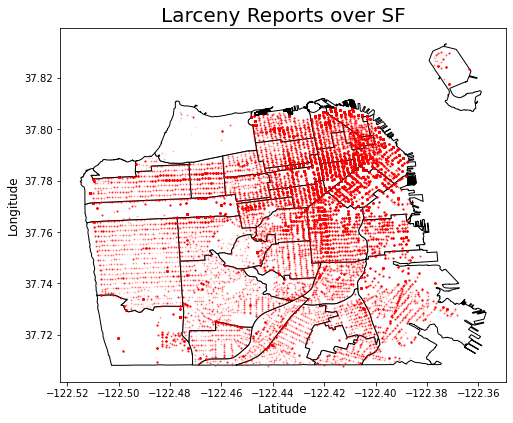

In [121]:
fig, ax = plt.subplots(figsize = (8,8))

sf.plot(ax = ax,color='white', edgecolor='black')

gdf = gpd.GeoDataFrame(larceny_data, geometry=gpd.points_from_xy(larceny_data.Longitude, larceny_data.Latitude))
gdf.plot(ax=ax, color='red',markersize = 1, alpha = 0.1)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_ylabel('Longitude', fontsize = 12)
ax.set_title('Larceny Reports over SF', fontsize = 20)

In [116]:
proportion(larceny_data['Analysis Neighborhood'].value_counts()).head(5)

Financial District/South Beach    11.33
Mission                            8.66
Tenderloin                         6.38
South of Market                    6.27
North Beach                        4.99
Name: Analysis Neighborhood, dtype: float64

In [122]:
proportion(larceny_data['Analysis Neighborhood'].value_counts()).tail(5)

Presidio           0.45
Lincoln Park       0.34
Treasure Island    0.22
Seacliff           0.15
McLaren Park       0.09
Name: Analysis Neighborhood, dtype: float64

In [127]:
sub_cat = larceny_data['Incident Subcategory'].value_counts().index

In [131]:
for i in range(8):
    print(sub_cat[i])
    print(proportion(larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]]['Analysis Neighborhood'].value_counts()).head(5))
    print(' ')

Larceny - From Vehicle
Mission                           8.03
Financial District/South Beach    7.38
North Beach                       6.58
South of Market                   5.73
Russian Hill                      5.28
Name: Analysis Neighborhood, dtype: float64
 
Larceny Theft - Other
Financial District/South Beach    14.32
Mission                           10.94
Tenderloin                         8.65
South of Market                    7.02
Castro/Upper Market                4.18
Name: Analysis Neighborhood, dtype: float64
 
Larceny Theft - From Building
Financial District/South Beach    13.97
Mission                            9.40
Tenderloin                         8.71
South of Market                    8.17
Marina                             3.53
Name: Analysis Neighborhood, dtype: float64
 
Larceny Theft - Shoplifting
Financial District/South Beach    34.93
Tenderloin                        16.11
South of Market                    5.56
Mission                            3.60
Lake

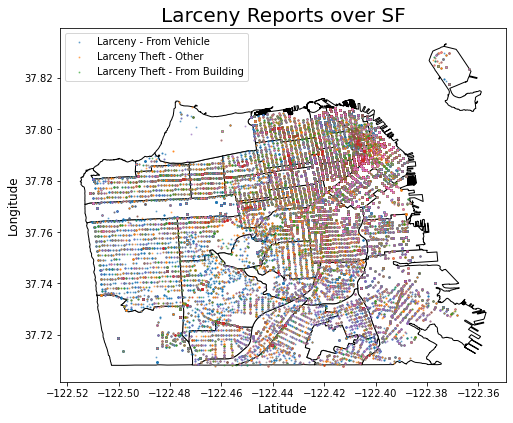

In [185]:
fig, ax = plt.subplots(figsize = (8,8))

sf.plot(ax = ax,color='white', edgecolor='black')
for i in range(8):
    x = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]].Longitude
    y = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]].Latitude
    data = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]]
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(x , y))
    if i < 3:
        gdf.plot(ax=ax, markersize = 1, alpha = 0.5,label = f'{sub_cat[i]}')
    else:
        gdf.plot(ax=ax, markersize = 1, alpha = 0.5)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_ylabel('Longitude', fontsize = 12)
ax.set_title('Larceny Reports over SF', fontsize = 20)
ax.legend(loc = 'upper left')

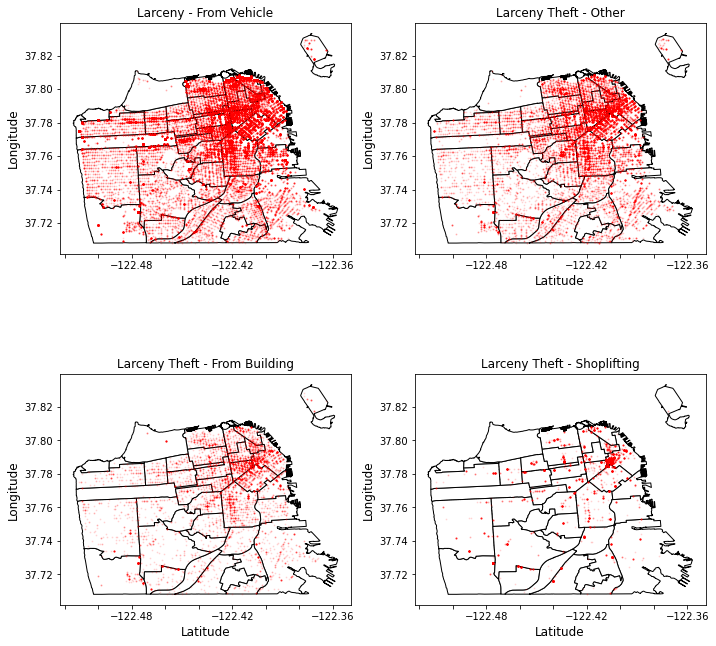

In [162]:
fig, axs = plt.subplots(2,2, figsize = (10,10))

for i, ax in zip(range(4), axs.flatten()):
    sf.plot(ax = ax,color='white', edgecolor='black')
    x = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]].Longitude
    y = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]].Latitude
    data = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]]
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(x , y))
    gdf.plot(ax=ax, markersize = 1, color = 'red', alpha = 0.1)
    ax.set_title(sub_cat[i], fontsize = 12)
    ax.set_xlabel('Latitude', fontsize = 12)
    ax.set_ylabel('Longitude', fontsize = 12)
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % 3 != 0:
            label.set_visible(False)

fig.tight_layout()

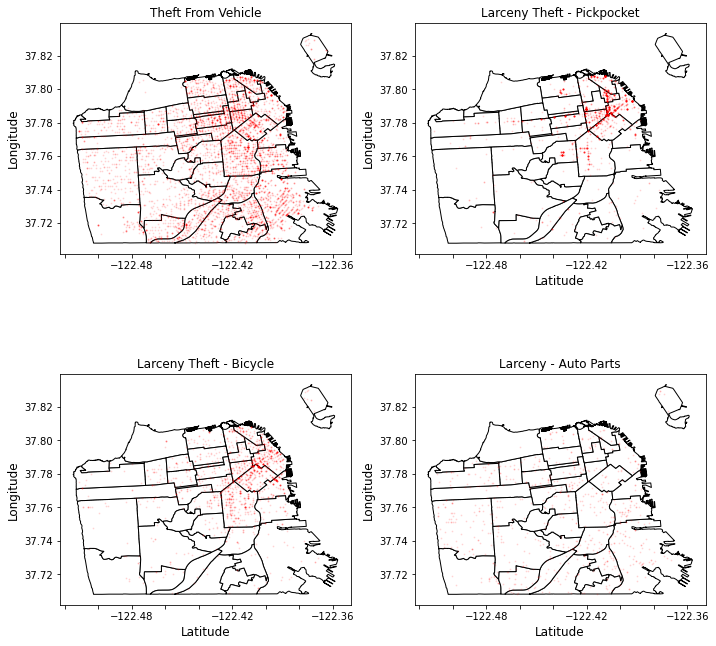

In [163]:
fig, axs = plt.subplots(2,2, figsize = (10,10))

for i, ax in zip(range(4,8), axs.flatten()):
    sf.plot(ax = ax,color='white', edgecolor='black')
    x = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]].Longitude
    y = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]].Latitude
    data = larceny_data[larceny_data['Incident Subcategory'] == sub_cat[i]]
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(x , y))
    gdf.plot(ax=ax, markersize = 1, color = 'red', alpha = 0.1)
    ax.set_title(sub_cat[i], fontsize = 12)
    ax.set_xlabel('Latitude', fontsize = 12)
    ax.set_ylabel('Longitude', fontsize = 12)
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % 3 != 0:
            label.set_visible(False)

fig.tight_layout()